# **Getting Started**

In this project, you will employ several supervised algorithms to accurately model Casualty Severity  using data collected from Leeds City - UK for 2011. We will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. 

We also will try to use data visualization and exploration to get some insights about the dataset.

# **Dataset Information**

The data attached is about Car Accidents across **Leeds City - UK** for 2011.  The outcome is to predict the variable which is Casualty Severity
**Data Description**

**Features**

1. Reference Number

2. Easting

3. Northing

4. Number of Vehicles

5. Accident Date

6. Time (24hr)

7. 1st Road Class :A roads – major roads intended to provide large-scale transport links within or between areas. B roads – roads intended to connect different areas, and to feed traffic between A roads and smaller roads on the network.

  All UK roads (excluding motorways) fall into the following 4 categories:

  A roads – major roads intended to provide large-scale transport links within or between areas
  B roads – roads intended to connect different areas, and to feed traffic between A roads and smaller roads on the network
  classified unnumbered – smaller roads intended to connect together unclassified roads with A and B roads, and often linking a housing estate or a village to the rest of the network. Similar to ‘minor roads’ on an Ordnance Survey map and sometimes known unofficially as C roads
  unclassified – local roads intended for local traffic. The vast majority (60%) of roads in the UK fall within this category

8. Road Surface

9. Lighting Conditions

10. Weather Conditions

11. Casualty Class

12. Sex of Casualty

13. Age of Casualty

14. Type of Vehicle

15. Casualty Severity

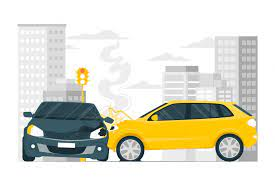

# **Import Libraries**

In [1]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [133]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import r2_score, classification_report,  roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder , RobustScaler, MaxAbsScaler
import category_encoders as ce
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from lightgbm import LGBMClassifier

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# **Functions**

In [3]:
def ReplaceObservationValue(colName, currentValue, UpdatedValue):
  '''
    Replace a specific value of some observation in a specific feature 

    arguements :  
      colName : the name of the feature 
      currentValue : the value we want to change from  
      UpdatedValue : the value we want to change to
      
    return : 
      the updated dataset
  '''
  dataset[colName].mask(dataset[colName] == currentValue, UpdatedValue, inplace=True)

# **Read Dataset**

In [4]:
path = '/content/sample_data/Road Accidents.xlsx'
dataset = pd.read_excel(path) 
dataset.head(5)

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,110016014.0,443330.0,439205.0,2.0,2011-01-12,712.0,A(M),Wet / Damp,Darkness: street lighting unknown,Raining without high winds,Driver,Slight,Male,62.0,Car
1,110016024.0,425059.0,433371.0,2.0,2011-01-12,830.0,Unclassified,Wet / Damp,Daylight: street lights present,Raining without high winds,Driver,Slight,Female,39.0,Car
2,110016533.0,420683.0,434373.0,1.0,2011-01-12,1215.0,A,Wet / Damp,Daylight: street lights present,Fine without high winds,Pedestrian,Serious,Male,66.0,Car
3,110017112.0,431097.0,433000.0,1.0,2011-01-12,1735.0,A,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Serious,Male,39.0,Goods vehicle 3.5 tonnes mgw and under
4,110020375.0,429523.0,433820.0,2.0,2011-01-12,1230.0,A,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Male,29.0,Car


# **EDA**

In [5]:
#check the shape of the dataset 
dataset.shape

(2604, 15)

In [6]:
#show the info of the dataset (note that there are no missing values but this can be missleading)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2604 entries, 0 to 2603
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Reference Number     2604 non-null   float64       
 1   Easting              2604 non-null   float64       
 2   Northing             2604 non-null   float64       
 3   Number of Vehicles   2604 non-null   float64       
 4   Accident Date        2604 non-null   datetime64[ns]
 5   Time (24hr)          2604 non-null   float64       
 6   1st Road Class       2604 non-null   object        
 7   Road Surface         2604 non-null   object        
 8   Lighting Conditions  2604 non-null   object        
 9   Weather Conditions   2604 non-null   object        
 10  Casualty Class       2604 non-null   object        
 11  Casualty Severity    2604 non-null   object        
 12  Sex of Casualty      2604 non-null   object        
 13  Age of Casualty      2604 non-nul

In [7]:
#check for duplication 
dataset.duplicated().sum()

17

In [8]:
#drop duplicates
dataset.drop_duplicates(inplace=True)

In [9]:
#check for duplication again
dataset.duplicated().sum()

0

In [10]:
#statistical data of the dataset (note that the minimum age is 0 and max age is 95)
dataset.describe()

,Reference Number,Easting,Northing,Number of Vehicles,Time (24hr),Age of Casualty
count,2.587000e+03,2587.000000,2587.000000,2587.000000,2587.000000,2587.000000
mean,1.102820e+08,430128.132973,434254.775029,1.959412,1407.061075,35.352532
std,1.978141e+06,5129.659821,4384.890796,0.802341,508.568896,18.478939
min,1.100189e+07,415290.000000,424216.000000,1.000000,5.000000,0.000000
25%,1.101731e+08,427127.000000,431781.500000,2.000000,1045.000000,22.000000
50%,1.103126e+08,430096.000000,434234.000000,2.000000,1455.000000,32.000000
75%,1.104572e+08,432514.500000,436177.500000,2.000000,1750.000000,46.000000
max,1.200074e+08,444895.000000,449409.000000,8.000000,2355.000000,95.000000


In [11]:
# label balancing (imbalanced dataset)
dataset.drop('Reference Number', axis=1,inplace=True)

In [12]:
dataset

,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,443330.0,439205.0,2.0,2011-01-12,712.0,A(M),Wet / Damp,Darkness: street lighting unknown,Raining without high winds,Driver,Slight,Male,62.0,Car
1,425059.0,433371.0,2.0,2011-01-12,830.0,Unclassified,Wet / Damp,Daylight: street lights present,Raining without high winds,Driver,Slight,Female,39.0,Car
2,420683.0,434373.0,1.0,2011-01-12,1215.0,A,Wet / Damp,Daylight: street lights present,Fine without high winds,Pedestrian,Serious,Male,66.0,Car
3,431097.0,433000.0,1.0,2011-01-12,1735.0,A,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Serious,Male,39.0,Goods vehicle 3.5 tonnes mgw and under
4,429523.0,433820.0,2.0,2011-01-12,1230.0,A,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Male,29.0,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2599,428984.0,435435.0,1.0,2011-12-31,1305.0,A,Wet / Damp,Daylight: street lights present,Raining without high winds,Pedestrian,Slight,Male,10.0,Car
2600,428058.0,432860.0,1.0,2011-12-31,128.0,Unclassified,Wet / Damp,Darkness: street lighting unknown,Raining without high winds,Passenger,Slight,Male,17.0,Car
2601,435402.0,436161.0,1.0,2011-12-31,1000.0,Unclassified,Wet / Damp,Daylight: street lights present,Fine with high winds,Passenger,Slight,Female,79.0,Bus or coach (17 or more passenger seats)
2602,431237.0,434797.0,2.0,2011-12-31,1445.0,Unclassified,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Male,24.0,Car


### **Data Quality Check (Data Cleaning and Visualization)**

**1. Number of Vehicles**

In [13]:
#acceptable feature values 
print(dataset['Number of Vehicles'].unique())

[2. 1. 4. 3. 5. 6. 8.]


In [14]:
#Frequency distribution of Number of Vehicles
print(dataset['Number of Vehicles'].value_counts())

2.0    1581
1.0     642
3.0     239
4.0      92
5.0      24
6.0       6
8.0       3
Name: Number of Vehicles, dtype: int64


Text(0.5, 1.0, 'Frequency distribution of Number of Vehicles')

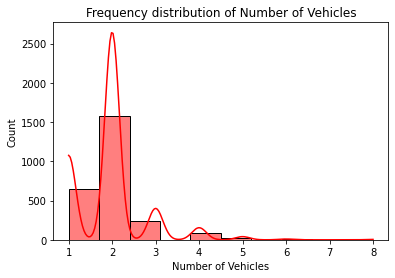

In [15]:
#let's visualize the distribution of the Number of Vehicles
ax = sns.histplot(dataset['Number of Vehicles'], kde=True, bins=10, color=['r'])
ax.set_title("Frequency distribution of Number of Vehicles")

**2. Accident Date**

In [16]:
#acceptable feature values 
print(dataset['Accident Date'].unique())

['2011-01-12T00:00:00.000000000' '2011-01-13T00:00:00.000000000'
 '2011-01-14T00:00:00.000000000' '2011-01-15T00:00:00.000000000'
 '2011-01-16T00:00:00.000000000' '2011-01-17T00:00:00.000000000'
 '2011-01-18T00:00:00.000000000' '2011-01-19T00:00:00.000000000'
 '2011-01-20T00:00:00.000000000' '2011-01-21T00:00:00.000000000'
 '2011-01-22T00:00:00.000000000' '2011-01-23T00:00:00.000000000'
 '2011-01-24T00:00:00.000000000' '2011-01-25T00:00:00.000000000'
 '2011-01-26T00:00:00.000000000' '2011-01-27T00:00:00.000000000'
 '2011-01-28T00:00:00.000000000' '2011-01-29T00:00:00.000000000'
 '2011-01-30T00:00:00.000000000' '2011-01-31T00:00:00.000000000'
 '2011-02-01T00:00:00.000000000' '2011-02-02T00:00:00.000000000'
 '2011-02-03T00:00:00.000000000' '2011-02-04T00:00:00.000000000'
 '2011-02-05T00:00:00.000000000' '2011-02-06T00:00:00.000000000'
 '2011-02-07T00:00:00.000000000' '2011-02-08T00:00:00.000000000'
 '2011-02-09T00:00:00.000000000' '2011-02-10T00:00:00.000000000'
 '2011-02-11T00:00:00.000

In [17]:
#the unique values in the months of Accident Date
dataset["Accident Date"].dt.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [18]:
#Frequency distribution of months Accident Date
print(pd.DataFrame(dataset["Accident Date"].dt.month.value_counts()))

    Accident Date
6             256
10            245
7             229
12            229
4             222
9             220
5             218
11            214
3             212
8             209
2             185
1             148


In [21]:
#splite the date to be month and day instead of timestamp 
dataset["Month"] = dataset["Accident Date"].dt.month
dataset["Day"] = dataset["Accident Date"].dt.day
dataset.drop(labels="Accident Date", axis=1, inplace=True)

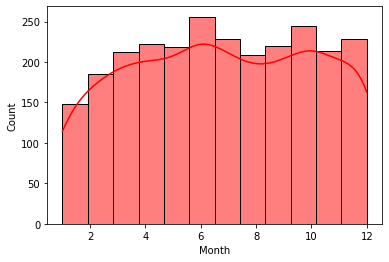

In [22]:
#let's visualize the distribution of the Months
sns.histplot(dataset['Month'], kde=True, bins=12, color=['r'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


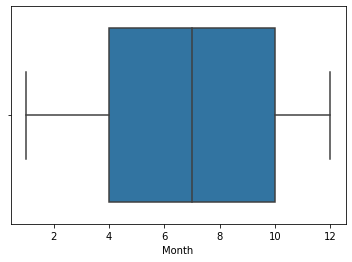

In [23]:
#let's check for outliers
sns.boxplot(dataset['Month'])

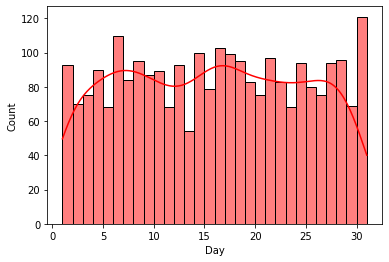

In [24]:
#let's visualize the distribution of the Days
sns.histplot(dataset['Day'], kde=True, bins=30, color=['r'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


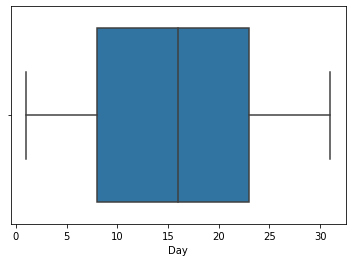

In [25]:
#let's check for outliers
sns.boxplot(dataset['Day'])

**3. Time (24hr)**

In [26]:
#acceptable feature values 
print(dataset['Time (24hr)'].unique())

[ 712.  830. 1215. 1735. 1230.  755.  808.  900. 1635. 1407.  750. 1940.
 1800.  920. 1025. 1450. 1350. 1513. 1750. 1725. 1938.  105.  100. 1920.
 1715. 1250. 1145. 1345. 1555.  800. 1515. 1700. 2035. 1640. 1000. 1005.
 1830. 1115.  850. 1650.   35. 1330. 2039. 2240. 1358.   13. 2125. 2250.
 1400. 2310. 1945.  820. 1855.   45. 1820. 2255. 2126. 1815.  831.  845.
 1525. 1829. 1845.  853. 1033. 1714. 1703. 1745. 1850. 1421.   50. 1225.
 1550. 2110. 1530.  816. 1402. 1535. 1430. 1440. 2115. 1915. 2320. 1848.
 1730. 1448. 1500. 1729. 1618.  740. 1245. 1235. 1512.  620.  950. 1130.
 1930. 1625. 1503.  228.  700.  928. 1338. 1510. 1619. 1046. 1952. 1710.
 1226. 1630. 2024. 1716. 2107. 2312.  128.  615. 1457. 1153. 1200. 1445.
 1825.  340.  715.  930. 1135. 1320. 2330.   15. 1344. 1205. 1610.  510.
 2120. 1910.  840.  650. 1620. 1720. 2105. 1221. 1744. 1803. 2305. 1545.
 1110. 1415. 1355. 1520.  905.  645. 1819. 1900. 2015. 2157. 1828.    5.
 1717.  200. 1705.  627. 1455. 1326. 1505. 1608.  3

In [27]:
#Frequency distribution of the feature
print(dataset['Time (24hr)'].value_counts())

1730.0    35
1600.0    28
1720.0    26
1800.0    25
1700.0    24
          ..
1307.0     1
1926.0     1
640.0      1
1506.0     1
535.0      1
Name: Time (24hr), Length: 555, dtype: int64


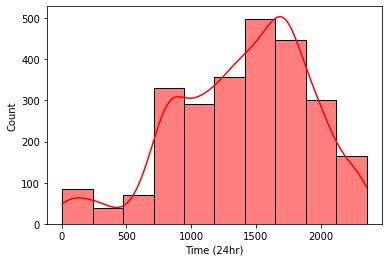

In [28]:
#let's visualize the distribution of Time (24hr)
sns.histplot(dataset['Time (24hr)'], kde=True, bins=10 , color=['r'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


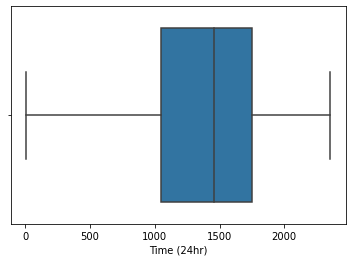

In [29]:
#let's check for outliers
sns.boxplot(dataset['Time (24hr)'])

**4. Age of Casualty**

In [30]:
#not acceptable feature values(note the zero)
dataset['Age of Casualty'].unique()

array([62., 39., 66., 29., 26., 11., 61., 30., 59.,  3., 23., 22., 13.,
       33., 46., 41., 49., 40., 56., 58., 78., 35., 53., 19., 20., 18.,
       64., 51., 10., 15., 52., 50., 44., 42., 54., 43., 31., 21., 12.,
       27., 25., 45., 28., 24., 17., 36.,  8., 37., 32., 67., 73., 79.,
       47., 71., 38., 57., 63.,  5., 16., 60., 76., 81., 85., 34.,  4.,
       48.,  6., 69., 82.,  1., 68.,  9., 72., 14., 87., 77., 65., 55.,
        2., 75., 80.,  7., 84., 83., 70., 74., 91., 89.,  0., 95., 88.,
       90., 86., 93., 94.])

In [31]:
#Frequency distribution of the feature
print(dataset['Age of Casualty'].value_counts())

20.0    92
19.0    82
22.0    79
26.0    72
24.0    70
        ..
87.0     2
89.0     1
95.0     1
93.0     1
94.0     1
Name: Age of Casualty, Length: 95, dtype: int64


In [32]:
#replace the non-sense value with the mean of the ages
ReplaceObservationValue('Age of Casualty', 0, round(dataset['Age of Casualty'].mean()))

In [33]:
#view all samples of the age again to double check
dataset['Age of Casualty'].unique()

array([62., 39., 66., 29., 26., 11., 61., 30., 59.,  3., 23., 22., 13.,
       33., 46., 41., 49., 40., 56., 58., 78., 35., 53., 19., 20., 18.,
       64., 51., 10., 15., 52., 50., 44., 42., 54., 43., 31., 21., 12.,
       27., 25., 45., 28., 24., 17., 36.,  8., 37., 32., 67., 73., 79.,
       47., 71., 38., 57., 63.,  5., 16., 60., 76., 81., 85., 34.,  4.,
       48.,  6., 69., 82.,  1., 68.,  9., 72., 14., 87., 77., 65., 55.,
        2., 75., 80.,  7., 84., 83., 70., 74., 91., 89., 95., 88., 90.,
       86., 93., 94.])

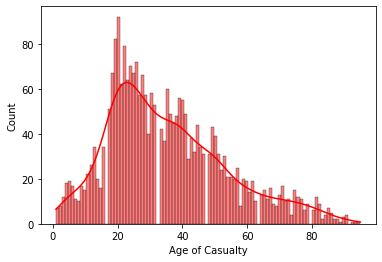

In [34]:
#let's visualize the distribution of Age of Casualty
sns.histplot(dataset['Age of Casualty'], kde=True, bins=100, color=['r'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


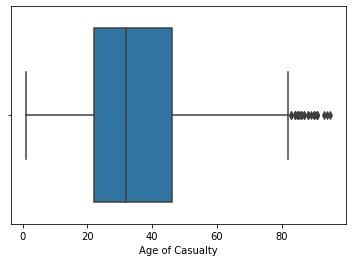

In [35]:
#let's check for outliers
sns.boxplot(dataset['Age of Casualty'])

**5. Sex of Casualty**

In [36]:
#acceptable feature values 
dataset['Sex of Casualty'].unique()

array(['Male', 'Female'], dtype=object)

In [37]:
#Frequency distribution of the feature
dataset['Sex of Casualty'].value_counts()

Male      1539
Female    1048
Name: Sex of Casualty, dtype: int64

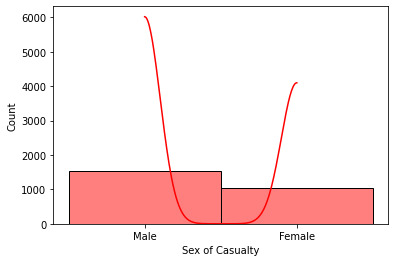

In [38]:
#let's visualize the distribution of the Days
sns.histplot(dataset['Sex of Casualty'], kde=True, bins=2, color=['r'])

**6. Type of Vehicle**

In [39]:
#acceptable feature values 
dataset['Type of Vehicle'].unique()

array(['Car', 'Goods vehicle 3.5 tonnes mgw and under', 'Pedal cycle',
       'Bus or coach (17 or more passenger seats)',
       'Minibus (8 – 16 passenger seats)', 'Motorcycle over 500cc',
       'Taxi/Private hire car', 'Motorcycle over 125cc and up to 500cc',
       'Motorcycle over 50cc and up to 125cc',
       'Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw',
       'Other Vehicle', 'Goods vehicle 7.5 tonnes mgw and over',
       'M/cycle 50cc and under', 'Ridden horse',
       'Agricultural vehicle (includes diggers etc.)'], dtype=object)

In [40]:
#Frequency distribution of the feature
dataset['Type of Vehicle'].value_counts()

Car                                                       1784
Pedal cycle                                                255
Bus or coach (17 or more passenger seats)                  169
Taxi/Private hire car                                       82
Goods vehicle 3.5 tonnes mgw and under                      73
Motorcycle over 50cc and up to 125cc                        71
Motorcycle over 500cc                                       60
M/cycle 50cc and under                                      28
Motorcycle over 125cc and up to 500cc                       20
Minibus (8 – 16 passenger seats)                            12
Other Vehicle                                               11
Goods vehicle 7.5 tonnes mgw and over                       11
Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw       8
Ridden horse                                                 2
Agricultural vehicle (includes diggers etc.)                 1
Name: Type of Vehicle, dtype: int64

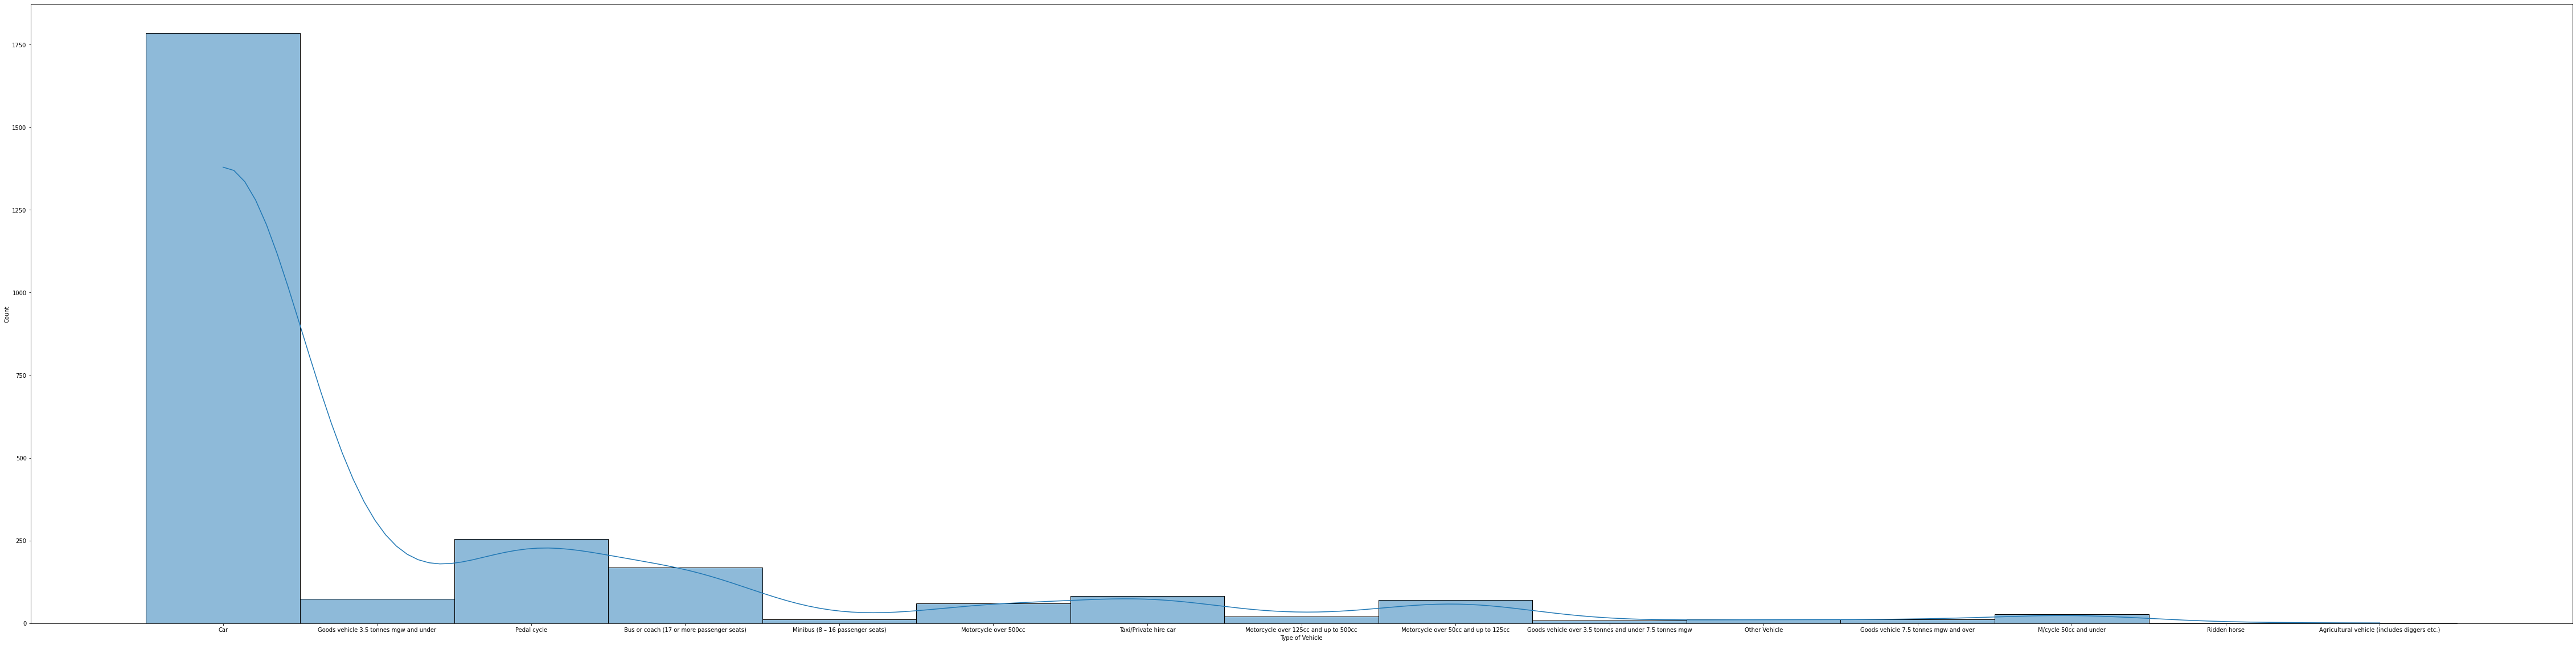

In [41]:
#let's visualize the distribution of the Days
a4_dims = (80, 20)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.histplot(dataset['Type of Vehicle'], kde=True, bins=100, ax=ax)

**7. Casualty Severity**

In [42]:
#acceptable feature values 
dataset['Casualty Severity'].unique()

array(['Slight', 'Serious', 'Fatal'], dtype=object)

In [43]:
#Frequency distribution of the feature (note that we have imbalanced dataset)
dataset['Casualty Severity'].value_counts()

Slight     2296
Serious     266
Fatal        25
Name: Casualty Severity, dtype: int64

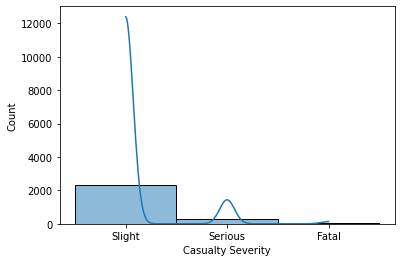

In [44]:
#let's visualize the distribution of the Casualty Severity
sns.histplot(dataset['Casualty Severity'], kde=True, bins=3)

**8. Weather Conditions**

In [45]:
#acceptable feature values however there are some data with unknown weather condition and other which introduces ambiguity
dataset['Weather Conditions'].unique()

array(['Raining without high winds', 'Fine without high winds',
       'Fine with high winds', 'Unknown', 'Raining with high winds',
       'Other', 'Fog or mist – if hazard'], dtype=object)

In [46]:
#Frequency distribution of the feature
dataset['Weather Conditions'].value_counts()

Fine without high winds       2268
Raining without high winds     211
Fine with high winds            54
Raining with high winds         35
Other                            9
Fog or mist – if hazard          9
Unknown                          1
Name: Weather Conditions, dtype: int64

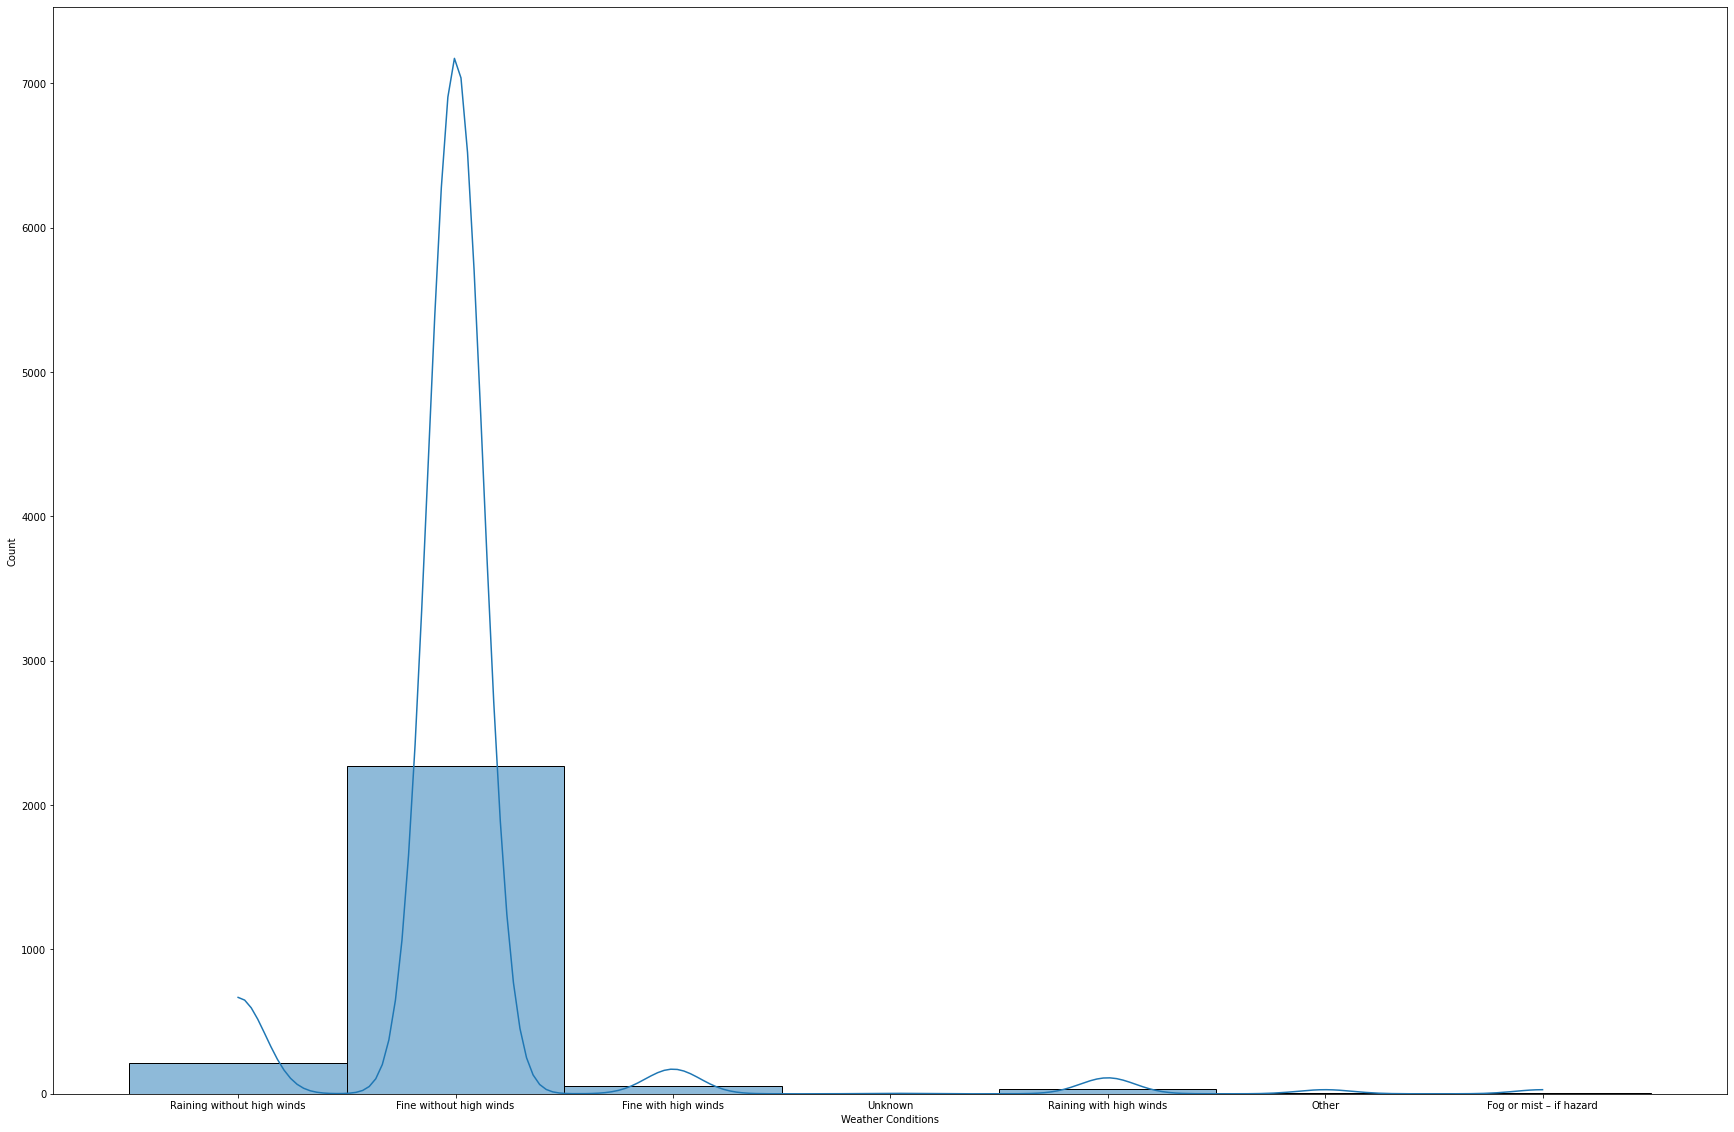

In [72]:
#let's visualize the distribution of the Weather Conditions
a4_dims = (30, 20)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.histplot(dataset['Weather Conditions'], kde=True, bins=50,ax=ax)

**9. Easting**

In [48]:
#acceptable feature values 
dataset['Easting'].unique()

array([443330., 425059., 420683., ..., 435402., 431237., 441284.])

In [49]:
#Frequency distribution of the feature
dataset['Easting'].value_counts()

431883.0    9
430797.0    8
430130.0    8
431884.0    7
430874.0    7
           ..
428861.0    1
421726.0    1
428147.0    1
424269.0    1
441284.0    1
Name: Easting, Length: 1712, dtype: int64

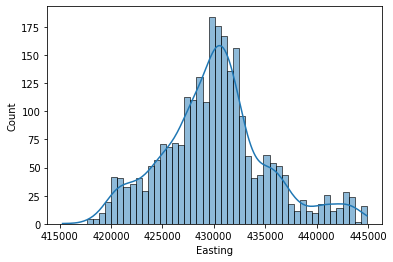

In [50]:
#let's visualize the distribution of the Days
sns.histplot(dataset['Easting'], kde=True, bins=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


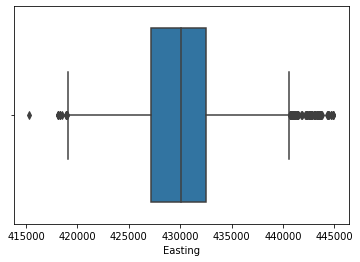

In [51]:
#let's check for outliers
sns.boxplot(dataset['Easting'])

**10. Northing**

In [52]:
#acceptable feature values 
dataset['Northing'].unique()

array([439205., 433371., 434373., ..., 432860., 436161., 434797.])

In [53]:
#Frequency distribution of the feature
dataset['Northing'].value_counts()

435042.0    10
435025.0    10
433457.0     8
434213.0     8
433481.0     7
            ..
442468.0     1
433911.0     1
432439.0     1
435166.0     1
434797.0     1
Name: Northing, Length: 1700, dtype: int64

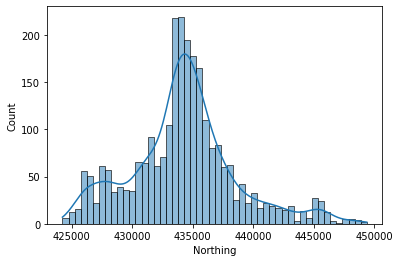

In [54]:
#let's visualize the distribution of Northing
sns.histplot(dataset['Northing'], kde=True, bins=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


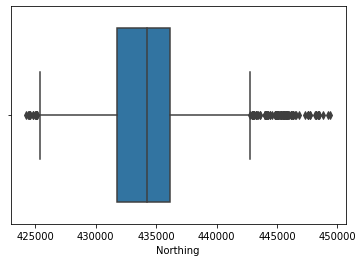

In [55]:
#let's check for outliers
sns.boxplot(dataset['Northing'])

**11. Road Surface**

In [56]:
#not acceptable feature values as the number 5 here is not valid  
print(dataset['Road Surface'].unique())
#check for the sus value 
dataset[dataset['Road Surface'] == 5.0]

['Wet / Damp' 'Dry' 'Frost / Ice' 5.0]


,Easting,Northing,Number of Vehicles,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle,Month,Day
2526,426648.0,441801.0,2.0,2305.0,A,5.0,Darkness: street lights present and lit,Fine without high winds,Driver,Slight,Male,37.0,Car,12,18


In [57]:
#Frequency distribution of the feature
dataset['Road Surface'].value_counts()

Dry            1998
Wet / Damp      568
Frost / Ice      20
5.0               1
Name: Road Surface, dtype: int64

In [58]:
#check for the day and the month of the sus data to see how can we replace it to a reasonable value 
dataset[dataset['Day'] == 18][dataset['Month'] == 12]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Easting,Northing,Number of Vehicles,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle,Month,Day
2521,431350.0,435056.0,2.0,1235.0,A,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Male,70.0,Car,12,18
2522,431350.0,435056.0,2.0,1235.0,A,Dry,Daylight: street lights present,Fine without high winds,Passenger,Slight,Female,50.0,Car,12,18
2523,431350.0,435056.0,2.0,1235.0,A,Dry,Daylight: street lights present,Fine without high winds,Passenger,Slight,Female,18.0,Car,12,18
2524,431350.0,435056.0,2.0,1235.0,A,Dry,Daylight: street lights present,Fine without high winds,Passenger,Slight,Male,17.0,Car,12,18
2525,431350.0,435056.0,2.0,1235.0,A,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Male,50.0,Car,12,18
2526,426648.0,441801.0,2.0,2305.0,A,5.0,Darkness: street lights present and lit,Fine without high winds,Driver,Slight,Male,37.0,Car,12,18
2527,431822.0,426303.0,3.0,1150.0,Motorway,Wet / Damp,Daylight: street lights present,Fine without high winds,Driver,Slight,Male,68.0,Car,12,18
2528,431822.0,426303.0,3.0,1150.0,Motorway,Wet / Damp,Daylight: street lights present,Fine without high winds,Passenger,Slight,Female,68.0,Car,12,18
2529,431822.0,426303.0,3.0,1150.0,Motorway,Wet / Damp,Daylight: street lights present,Fine without high winds,Passenger,Slight,Female,1.0,Car,12,18
2530,431822.0,426303.0,3.0,1150.0,Motorway,Wet / Damp,Daylight: street lights present,Fine without high winds,Passenger,Slight,Female,53.0,Car,12,18


In [59]:
#replacing the value 
ReplaceObservationValue('Road Surface', 5, 'Dry')

In [60]:
#Frequency distribution of the feature
dataset['Road Surface'].value_counts()

Dry            1999
Wet / Damp      568
Frost / Ice      20
Name: Road Surface, dtype: int64

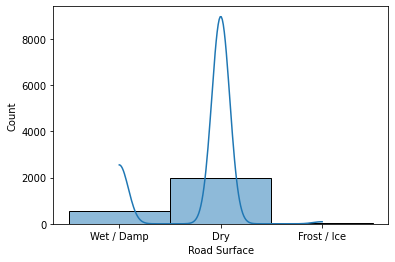

In [61]:
#let's visualize the distribution of the Road Surface
sns.histplot(dataset['Road Surface'], kde=True, bins=50)

**12. Lighting Conditions**

In [62]:
#acceptable feature values 
dataset['Lighting Conditions'].unique()

array(['Darkness: street lighting unknown',
       'Daylight: street lights present',
       'Darkness: street lights present and lit',
       'Darkness: street lights present but unlit',
       'Darkness: no street lighting'], dtype=object)

In [63]:
#Frequency distribution of the feature
dataset['Lighting Conditions'].value_counts()

Daylight: street lights present              1919
Darkness: street lights present and lit       498
Darkness: street lighting unknown             126
Darkness: no street lighting                   41
Darkness: street lights present but unlit       3
Name: Lighting Conditions, dtype: int64

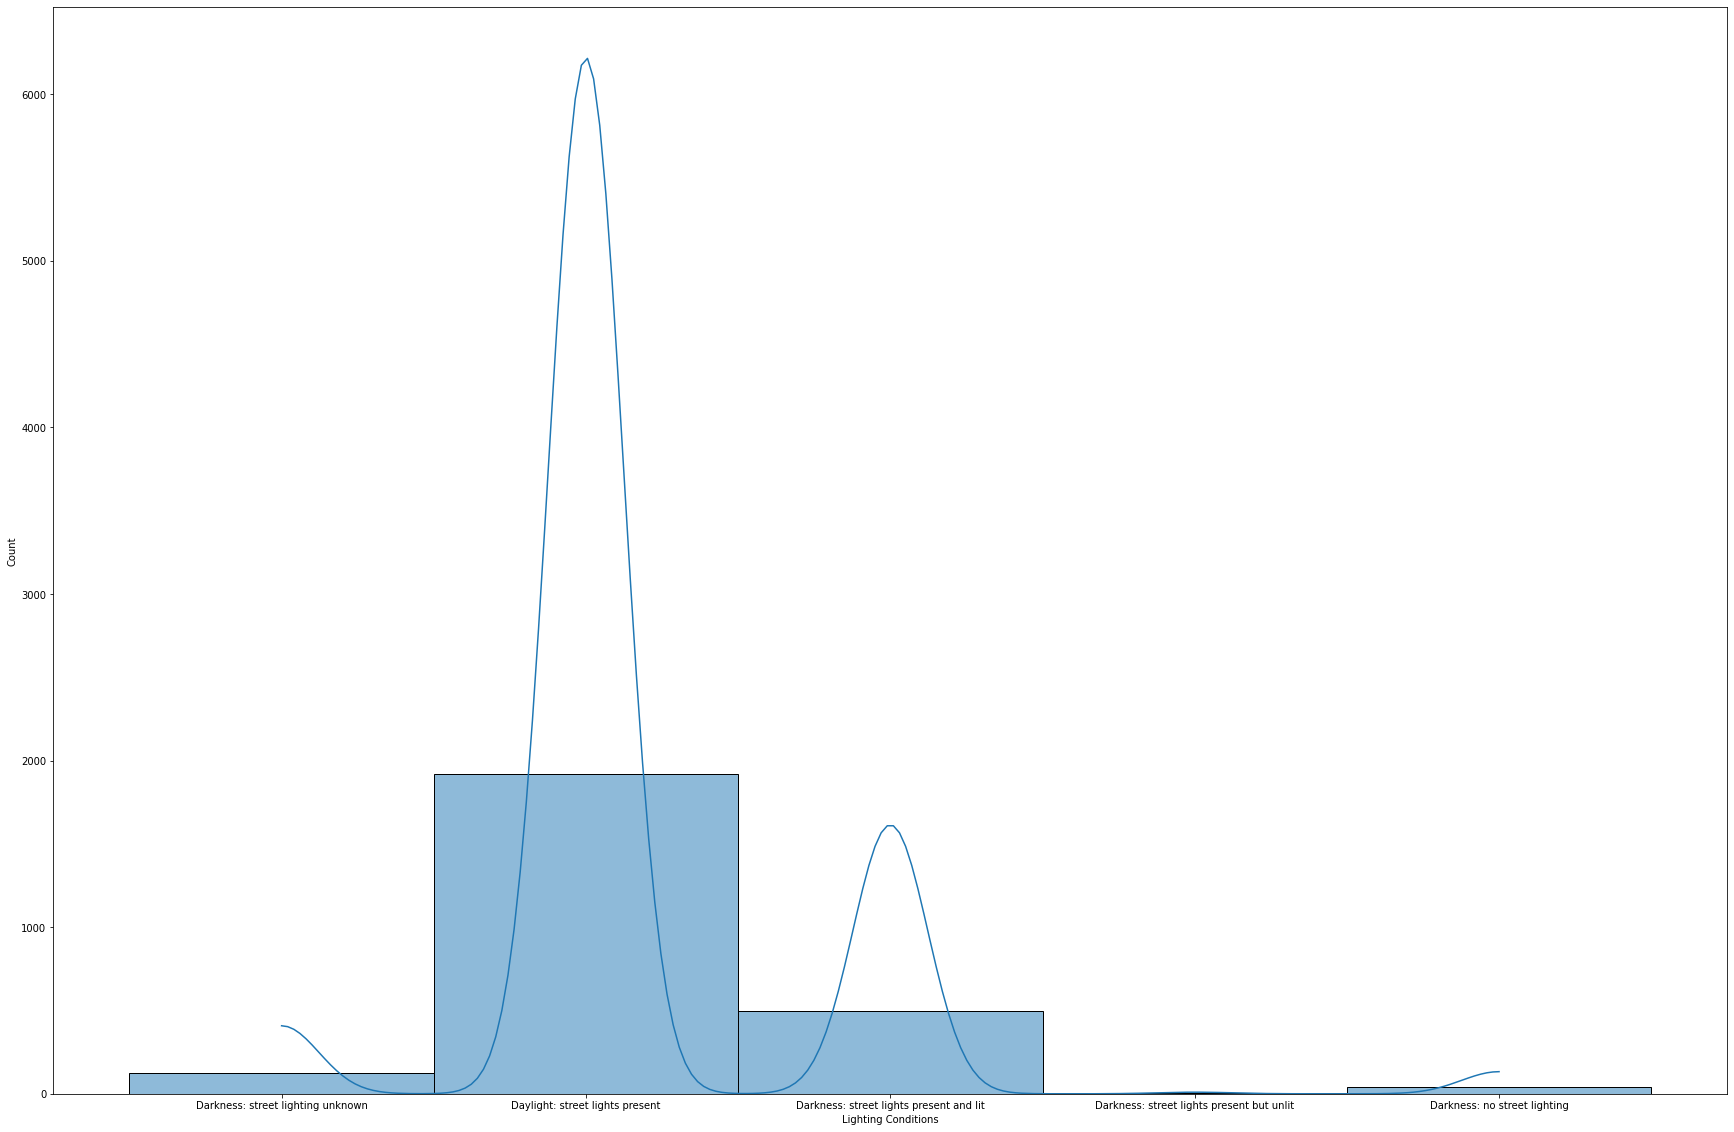

In [419]:
#let's visualize the distribution of the Lighting Conditions
a4_dims = (30, 20)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.histplot(dataset['Lighting Conditions'], kde=True, bins=5,ax=ax)

**13. Casualty Class**

In [65]:
#acceptable feature values 
dataset['Casualty Class'].unique()

array(['Driver', 'Pedestrian', 'Passenger'], dtype=object)

In [66]:
#Frequency distribution of the feature
dataset['Casualty Class'].value_counts()

Driver        1550
Passenger      701
Pedestrian     336
Name: Casualty Class, dtype: int64

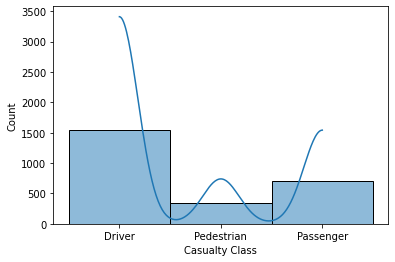

In [67]:
#let's visualize the distribution of the Casualty Class
sns.histplot(dataset['Casualty Class'], kde=True, bins=10)

**14. 1st Road Class**

In [68]:
#acceptable feature values 
dataset['1st Road Class'].unique()

array(['A(M)', 'Unclassified', 'A', 'B', 'Motorway'], dtype=object)

In [69]:
#Frequency distribution of the feature
dataset['1st Road Class'].value_counts()

Unclassified    1204
A                978
Motorway         166
B                163
A(M)              76
Name: 1st Road Class, dtype: int64

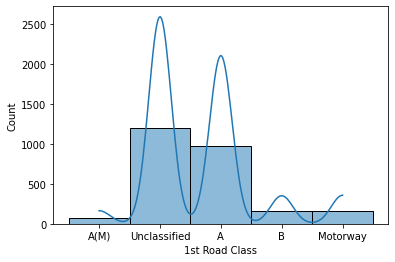

In [70]:
#let's visualize the distribution of the 1st Road Class
sns.histplot(dataset['1st Road Class'], kde=True, bins=30)

# **Data Splitting**

In [73]:
#define the features and the label
Features = dataset.drop(['Casualty Severity'], axis = 1)
Label = dataset['Casualty Severity']

In [74]:
#train test split using stratify because of the imbalance of the data (before any transformation to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(Features, Label, test_size=0.2, random_state=42 , stratify = Label, shuffle=True)

In [75]:
#define the features and the label in a list 
categorical_features = ['Road Surface', '1st Road Class', 'Casualty Class', 'Lighting Conditions', 'Weather Conditions', 'Sex of Casualty','Type of Vehicle']
target = ['Casualty Severity']

In [76]:
#double check for the ratio between the training label and test label
y_train.value_counts()

Slight     1836
Serious     213
Fatal        20
Name: Casualty Severity, dtype: int64

In [77]:
#double check for the ratio between the training label and test label
y_test.value_counts()

Slight     460
Serious     53
Fatal        5
Name: Casualty Severity, dtype: int64

# **Approaches**

### **1. First approach**

We will deal with the label as multiclass classification

Which is the most important ? 

we'll assume that recall is the most important in this problem so that we must not say it's not a fatal accident and it's actually a fatal accident (recall decreases as the false negative increases which gives us an indication of how good our model) 

however we don't care much about precision as even if we say it's a fatal accident and we dicovered later that it's not it'll not be that harm to think about as a real world probelm.

In [88]:
#initiate the encoder
Ordinalencoder_label = ce.OrdinalEncoder(target)
Ordinalencoder_features = ce.OrdinalEncoder(categorical_features)

In [89]:
#initiate the scaler 
MaxAbsScalerscaler = MaxAbsScaler()  #the scaler with the best result  

In [90]:
#initiate the sampling techniques
overSampler = SMOTE(sampling_strategy='all')
underSampler = RandomUnderSampler(sampling_strategy='all')

In [91]:
#use the encoder on the train and test label
Ordinalencoder_label.fit(y_train)
try:  
  y_train = Ordinalencoder_label.transform(y_train)
  y_test = Ordinalencoder_label.transform(y_test)
except:
  print('y contains previously unseen labels')

### **1. RandomForest Model**

In [105]:
#initiate the model with random parameter 
rf = RandomForestClassifier(n_estimators=1000, ccp_alpha=0.0001, criterion='entropy', max_depth=7, n_jobs=-1, random_state=42)

In [117]:
#define the stages and the pipeline 
stages = [ ('encoder', Ordinalencoder_features), ('scaler', MaxAbsScalerscaler), ('over',overSampler), ('under', underSampler), ('rf',  rf)]

rf_pipeline = Pipeline(steps= stages)

In [108]:
#intiate the cross validation and note it's a stratified kfold 
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(rf_pipeline, X_train, y_train, scoring='recall_macro', cv=cv, n_jobs=-1 )

In [109]:
#the score of all models 
scores

array([0.43228088, 0.37741546, 0.59351277, 0.3760352 , 0.4073499 ,
       0.39872326, 0.45984435, 0.44047028, 0.46655075, 0.44002082])

In [110]:
#the mean score of all models 
scores.mean()

0.43922036524495545

In [111]:
#fit the pipeline and note the required score 
rf_pipeline.fit(X_train, y_train.values.ravel())

predictions = rf_pipeline.predict(X_test)
print('macro_recall_score', recall_score(y_test, predictions, average='macro'))
print("Classification Report: \n", classification_report(y_test, predictions))

/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py:266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)


macro_recall_score 0.5000136724090785
Classification Report: 
               precision    recall  f1-score   support

           1       0.93      0.77      0.85       460
           2       0.21      0.53      0.30        53
           3       0.25      0.20      0.22         5

    accuracy                           0.74       518
   macro avg       0.46      0.50      0.46       518
weighted avg       0.85      0.74      0.78       518



**RandomForest Tunning**

In [116]:
#using grid search to tune the model 
param_grid = { 
    'rf__n_estimators': [200, 500],
    'rf__max_features': ['auto', 'sqrt', 'log2'],
    'rf__max_depth' : [4,5,6,7,8],
    'rf__criterion' :['gini', 'entropy']
}

clf = GridSearchCV(rf_pipeline, param_grid,cv=5)
clf.fit(X_train,y_train.values.ravel())
print(clf.best_params_)

{'rf__criterion': 'entropy', 'rf__max_depth': 8, 'rf__max_features': 'sqrt', 'rf__n_estimators': 200}


In [119]:
#tune the new parameters 
rf = RandomForestClassifier(n_estimators=200, ccp_alpha=0.0001, criterion='entropy', max_depth=8, n_jobs=-1, random_state=42, max_features='sqrt')

In [120]:
#initiate the new pipeline
stages = [ ('encoder', Ordinalencoder_features), ('scaler', MaxAbsScalerscaler), ('over',overSampler), ('under', underSampler), ('rf',  rf)]

rf_pipeline = Pipeline(steps= stages)

In [121]:
#fit the new pipeline and note the required score 
rf_pipeline.fit(X_train, y_train.values.ravel())

predictions = rf_pipeline.predict(X_test)
print('macro_recall_score', recall_score(y_test, predictions, average='macro'))
print("Classification Report: \n", classification_report(y_test, predictions))

macro_recall_score 0.48500136724090787
Classification Report: 
               precision    recall  f1-score   support

           1       0.92      0.80      0.86       460
           2       0.21      0.45      0.28        53
           3       0.33      0.20      0.25         5

    accuracy                           0.76       518
   macro avg       0.49      0.49      0.46       518
weighted avg       0.85      0.76      0.79       518



In [122]:
#get the coeffienct of each feature 
rf_pipeline[-1].feature_importances_

array([0.04084093, 0.03600457, 0.1320048 , 0.06573265, 0.07072682,
       0.07549938, 0.04641638, 0.05330465, 0.08162723, 0.0319304 ,
       0.12702234, 0.11709221, 0.0706176 , 0.05118006])

In [123]:
# view the feature scores
feature_scores = pd.Series(rf_pipeline[-1].feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Number of Vehicles     0.132005
Age of Casualty        0.127022
Type of Vehicle        0.117092
Casualty Class         0.081627
Road Surface           0.075499
1st Road Class         0.070727
Month                  0.070618
Time (24hr)            0.065733
Weather Conditions     0.053305
Day                    0.051180
Lighting Conditions    0.046416
Easting                0.040841
Northing               0.036005
Sex of Casualty        0.031930
dtype: float64

In [124]:
#print the names of the features 
feature_scores.index

Index(['Number of Vehicles', 'Age of Casualty', 'Type of Vehicle',
       'Casualty Class', 'Road Surface', '1st Road Class', 'Month',
       'Time (24hr)', 'Weather Conditions', 'Day', 'Lighting Conditions',
       'Easting', 'Northing', 'Sex of Casualty'],
      dtype='object')

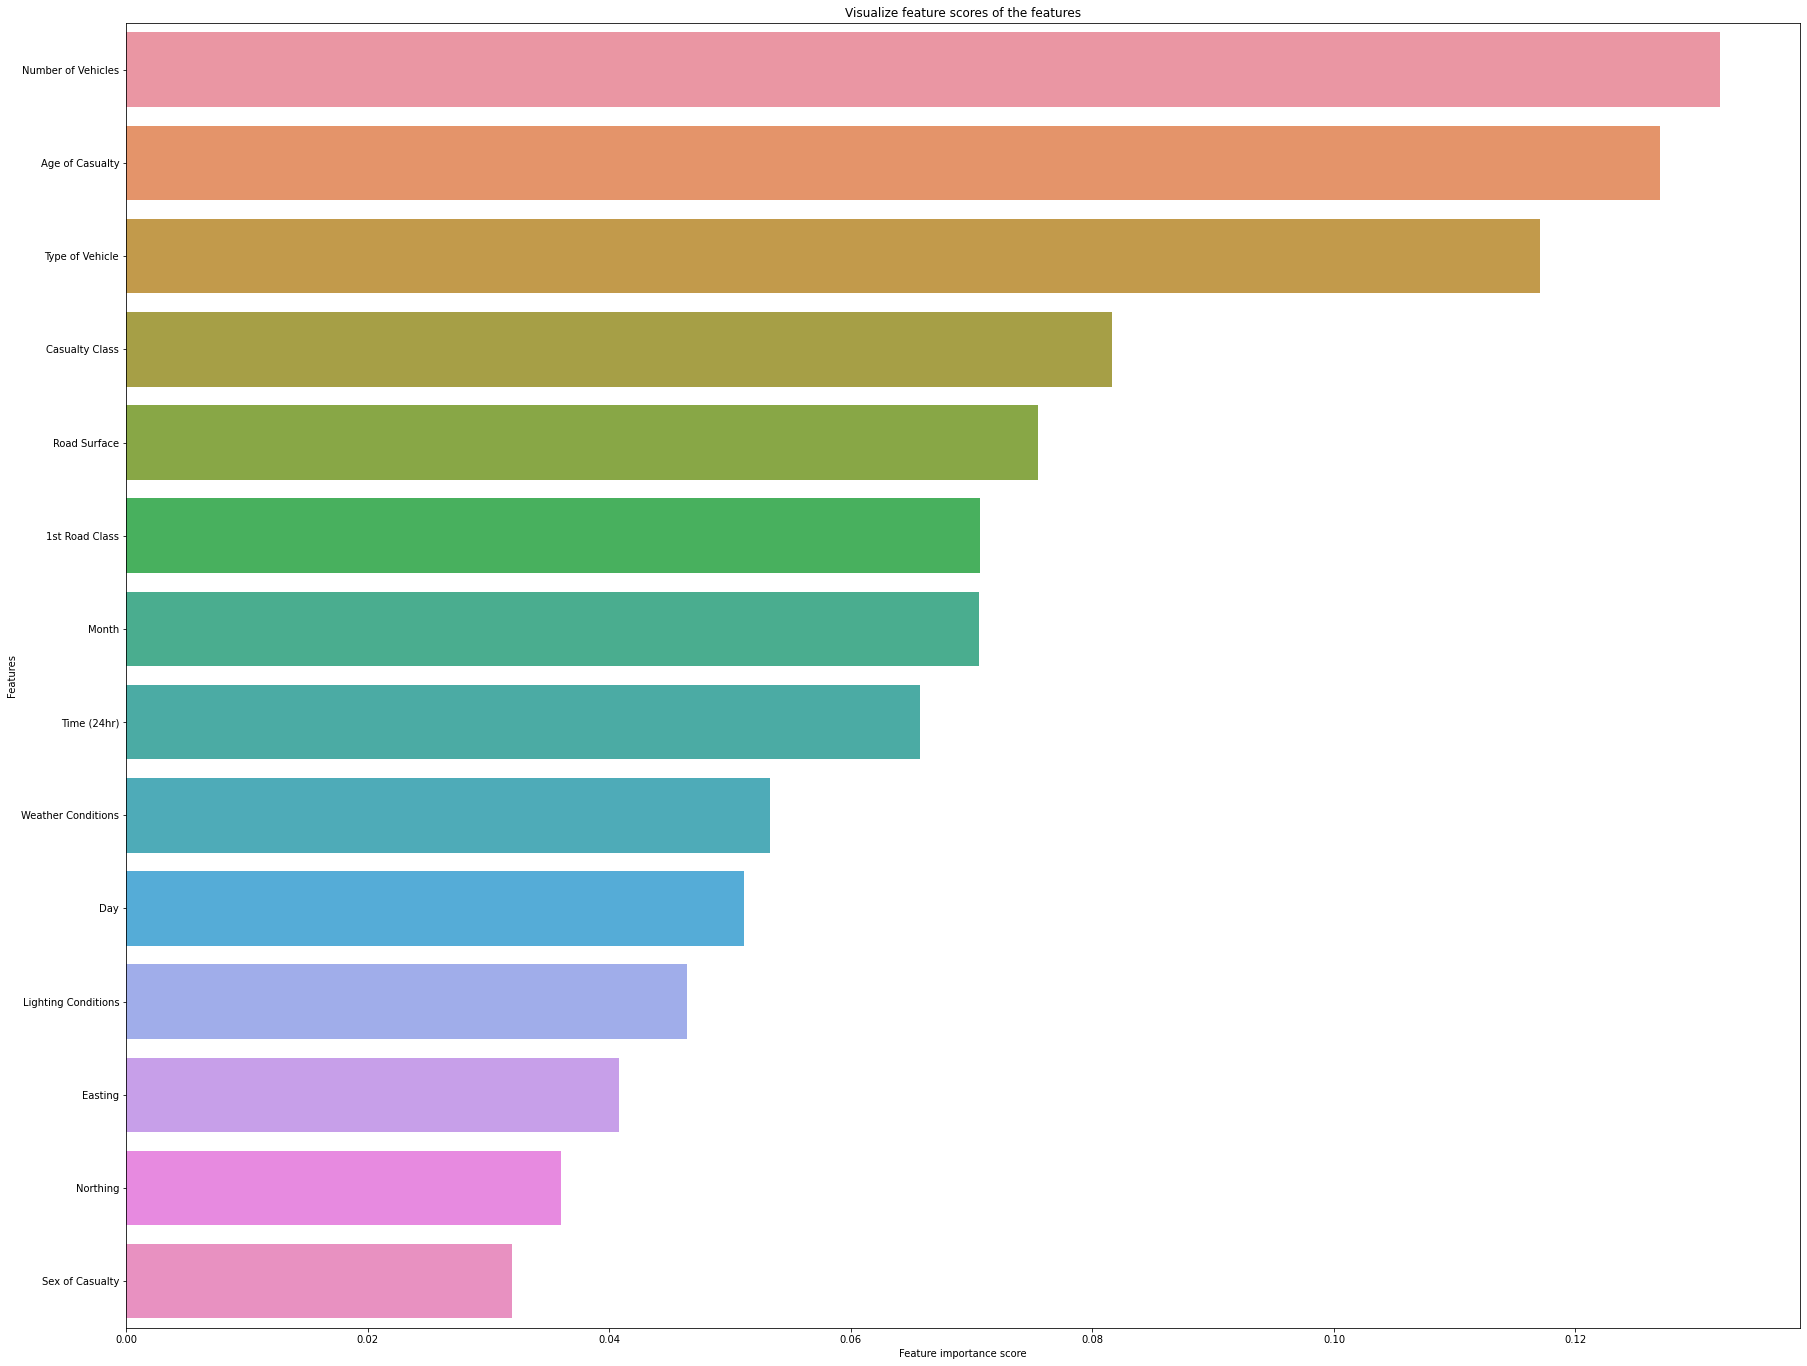

In [125]:
#visualie the feature importance 
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

### **2. SVM Model**

In [90]:
#initiate the model with random parameter 
svc = SVC(C=1.0, kernel='rbf', max_iter=-1, random_state=42, decision_function_shape='ovo', gamma=0.20)

In [97]:
#define the stages and the pipeline 
stages = [ ('encoder', Ordinalencoder_features), ('scaler', MaxAbsScalerscaler), ('over',overSampler), ('under', underSampler), ('svc',  svc)]

svc_pipeline = Pipeline(steps= stages)

In [774]:
#intiate the cross validation and note it's a stratified kfold 
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(svc_pipeline, X_train, y_train, scoring='recall_macro', cv=cv, n_jobs=-1 )

In [775]:
#the score of all models 
scores

array([0.58540373, 0.56590752, 0.59946515, 0.57815735, 0.7094548 ,
       0.4468599 , 0.62642822, 0.40519954, 0.45313794, 0.56791569])

In [776]:
#calculate the mean score of all the models 
scores.mean()

0.5537929827755202

In [93]:
#fit the pipeline and note the required score 
svc_pipeline.fit(X_train, y_train.values.ravel())

predictions = svc_pipeline.predict(X_test)
print('macro_recall_score', recall_score(y_test, predictions, average='macro'))
print("Classification Report: \n", classification_report(y_test, predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


macro_recall_score 0.5886792452830188
Classification Report: 
               precision    recall  f1-score   support

           1       0.94      0.60      0.73       460
           2       0.17      0.57      0.26        53
           3       0.07      0.60      0.12         5

    accuracy                           0.60       518
   macro avg       0.39      0.59      0.37       518
weighted avg       0.85      0.60      0.68       518



**Model Tunning**

In [98]:
#using grid search to tune the model 
param_grid = [
  {'svc__C': [1, 10, 100, 1000], 'svc__gamma': [0.001, 0.0001], 'svc__kernel': ['linear']},
  {'svc__C': [1, 10, 100, 1000], 'svc__gamma': [0.001, 0.0001], 'svc__kernel': ['rbf']},
 ]

clf = GridSearchCV(svc_pipeline, param_grid,cv=5)
clf.fit(X_train,y_train.values.ravel())
print(clf.best_params_)

{'svc__C': 100, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [99]:
#tune the new parameters 
svc = SVC(C=100, kernel='rbf', max_iter=-1, random_state=42, decision_function_shape='ovo', gamma=0.001)

In [100]:
#update the pipeline 
stages = [ ('encoder', Ordinalencoder_features), ('scaler', MaxAbsScalerscaler), ('over',overSampler), ('under', underSampler), ('svc',  svc)]

svc_pipeline = Pipeline(steps= stages)

In [101]:
#fit the new pipeline and note the required score 
svc_pipeline.fit(X_train, y_train.values.ravel())

predictions = svc_pipeline.predict(X_test)
print('macro_recall_score', recall_score(y_test, predictions, average='macro'))
print("Classification Report: \n", classification_report(y_test, predictions))

macro_recall_score 0.5814328684714246
Classification Report: 
               precision    recall  f1-score   support

           1       0.94      0.58      0.72       460
           2       0.20      0.57      0.30        53
           3       0.04      0.60      0.07         5

    accuracy                           0.58       518
   macro avg       0.39      0.58      0.36       518
weighted avg       0.85      0.58      0.67       518



### **3. MLP Model**

In [142]:
#initiate the model with random parameter 
mlp = MLPClassifier(solver='adam', activation='logistic', alpha=1e-4, random_state=42, max_iter=1000, early_stopping=True, validation_fraction=0.2, warm_start=True, verbose=False, learning_rate ='adaptive', learning_rate_init=0.01)

In [143]:
#define the stages and the pipeline 
stages = [ ('encoder', Ordinalencoder_features), ('scaler', MaxAbsScalerscaler), ('over',overSampler), ('under', underSampler), ('mlp',  mlp)]

mlp_pipeline = Pipeline(steps= stages)

In [136]:
#intiate the cross validation and note it's a stratified kfold 
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(mlp_pipeline, X_train, y_train, scoring='recall_macro', cv=cv, n_jobs=-1 )

In [137]:
#the score of all models 
scores

array([0.521049  , 0.49568668, 0.54011387, 0.53467909, 0.63785369,
       0.58816425, 0.70392449, 0.37547607, 0.45736049, 0.72001041])

In [138]:
#calculate the mean score of all the models 
scores.mean()

0.5574318045540426

In [139]:
#fit the pipeline and note the required score 
mlp_pipeline.fit(X_train, y_train.values.ravel())

predictions = mlp_pipeline.predict(X_test)
print('macro_recall_score', recall_score(y_test, predictions, average='macro'))
print("Classification Report: \n", classification_report(y_test, predictions))

macro_recall_score 0.5833743505605687
Classification Report: 
               precision    recall  f1-score   support

           1       0.94      0.57      0.71       460
           2       0.16      0.58      0.25        53
           3       0.06      0.60      0.11         5

    accuracy                           0.57       518
   macro avg       0.39      0.58      0.36       518
weighted avg       0.85      0.57      0.65       518



**Model Tunning**

In [297]:
#tune the new parameters 
mlp = MLPClassifier(solver='adam', activation='relu', alpha=1e-4, random_state=42, max_iter=1000, early_stopping=True, validation_fraction=0.2, warm_start=True, verbose=False, learning_rate ='adaptive', learning_rate_init=0.01)

In [298]:
#update the pipeline 
stages = [ ('encoder', Ordinalencoder_features), ('scaler', MaxAbsScalerscaler), ('over',overSampler), ('under', underSampler), ('svc',  svc)]

mlp_pipeline = Pipeline(steps= stages)

In [299]:
#fit the new pipeline and note the required score 
mlp_pipeline.fit(X_train, y_train.values.ravel())

predictions = mlp_pipeline.predict(X_test)
print('macro_recall_score', recall_score(y_test, predictions, average='macro'))
print("Classification Report: \n", classification_report(y_test, predictions))

macro_recall_score 0.6568590704647677
Classification Report: 
               precision    recall  f1-score   support

           1       0.94      0.64      0.76       460
           2       0.19      0.67      0.30        58

    accuracy                           0.64       518
   macro avg       0.57      0.66      0.53       518
weighted avg       0.86      0.64      0.71       518



### **2. Second approach**

In this approach we'll assume the Fatal and Serious have the same importance so we'll consider them the same class and make the problem binary classification and deal with it as a fraud problem.

### **Data Splitting**

In [92]:
ReplaceObservationValue('Casualty Severity', 'Fatal', 'Serious')

In [93]:
#define the features and the label
Features = dataset.drop(['Casualty Severity'], axis = 1)
Label = dataset['Casualty Severity']

In [94]:
Label.value_counts()

Slight     2296
Serious     291
Name: Casualty Severity, dtype: int64

In [95]:
#train test split using stratify because of the imbalance of the data (before any transformation to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(Features, Label, test_size=0.2, random_state=42 , stratify = Label, shuffle=True)

In [96]:
#define the features and the label in a list 
categorical_features = ['Road Surface', '1st Road Class', 'Casualty Class', 'Lighting Conditions', 'Weather Conditions', 'Sex of Casualty','Type of Vehicle']
target = ['Casualty Severity']

In [97]:
#double check for the ratio between the training label and test label
y_train.value_counts()

Slight     1836
Serious     233
Name: Casualty Severity, dtype: int64

In [98]:
#double check for the ratio between the training label and test label
y_test.value_counts()

Slight     460
Serious     58
Name: Casualty Severity, dtype: int64

### **Pipeline**

In [109]:
#initiate the encoder
Ordinalencoder_label = ce.OrdinalEncoder(target)
Ordinalencoder_features = ce.OrdinalEncoder(categorical_features)

In [251]:
#initiate the scaler 
MaxAbsScalerscaler = MaxAbsScaler()  #the scaler with the best result  

In [403]:
#initiate the sampling techniques
rus = SMOTE(sampling_strategy='minority')
# sampling_strategy=0.7

In [391]:
#use the encoder on the train and test label
Ordinalencoder_label.fit(y_train)
try:  
  y_train = Ordinalencoder_label.transform(y_train)
  y_test = Ordinalencoder_label.transform(y_test)
except:
  print('y contains previously unseen labels')

### **1. LogisticRegression Model**

In [239]:
#initiate the model with random parameter 
class_weight = {1: 1, 2: 2}
lr = LogisticRegression(class_weight=class_weight)

In [240]:
#define the stages and the pipeline 
stages = [ ('encoder', Ordinalencoder_features), ('scaler', MaxAbsScalerscaler), ('rus', rus), ('lr',  lr)]

lr_pipeline = Pipeline(steps= stages)

In [241]:
#intiate the cross validation and note it's a stratified kfold 
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(lr_pipeline, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1 )

In [242]:
#the score of all models 
scores

array([0.71526465, 0.60467864, 0.81072779, 0.73818526, 0.6665879 ,
       0.73582231, 0.71948998, 0.70833333, 0.68875228, 0.65526253])

In [243]:
#calculate the mean score of all the models 
scores.mean()

0.7043104665296241

In [244]:
#fit the pipeline and note the required score 
lr_pipeline.fit(X_train, y_train.values.ravel())

predictions = lr_pipeline.predict(X_test)
print('roc_auc_score', roc_auc_score(y_test, predictions, average='macro'))
print("Classification Report: \n", classification_report(y_test, predictions))

roc_auc_score 0.6082833583208396
Classification Report: 
               precision    recall  f1-score   support

           1       0.95      0.37      0.53       460
           2       0.14      0.84      0.25        58

    accuracy                           0.42       518
   macro avg       0.55      0.61      0.39       518
weighted avg       0.86      0.42      0.50       518



**Model Tunning**

In [294]:
#tune the new parameters 
class_weight = {1: 1, 2: 3}
lr = LogisticRegression(class_weight=class_weight, C= 1000, penalty= 'l2', max_iter=200)

In [295]:
#update the pipeline 
stages = [ ('encoder', Ordinalencoder_features), ('scaler', MaxAbsScalerscaler), ('rus', rus), ('lr',  lr)]

lr_pipeline = Pipeline(steps= stages)

In [296]:
#fit the new pipeline and note the required score 
lr_pipeline.fit(X_train, y_train.values.ravel())

predictions = lr_pipeline.predict(X_test)
print('roc_auc_score', roc_auc_score(y_test, predictions, average='macro'))
print("Classification Report: \n", classification_report(y_test, predictions))

roc_auc_score 0.565592203898051
Classification Report: 
               precision    recall  f1-score   support

           1       0.95      0.22      0.35       460
           2       0.13      0.91      0.23        58

    accuracy                           0.30       518
   macro avg       0.54      0.57      0.29       518
weighted avg       0.86      0.30      0.34       518



### **2. SVM Model**

In [410]:
svc = SVC(C=15, kernel='linear', max_iter=-1, random_state=42, decision_function_shape='ovo', gamma=0.002)

In [411]:
#update the pipeline 
stages = [ ('encoder', Ordinalencoder_features), ('scaler', MaxAbsScalerscaler), ('rus', rus), ('knn',  svc)]

svc_pipeline = Pipeline(steps= stages)

In [412]:
#fit the new pipeline and note the required score 
svc_pipeline.fit(X_train, y_train.values.ravel())

predictions = svc_pipeline.predict(X_test)
print('roc_auc_score', roc_auc_score(y_test, predictions, average='macro'))
print("Classification Report: \n", classification_report(y_test, predictions))

roc_auc_score 0.708808095952024
Classification Report: 
               precision    recall  f1-score   support

           1       0.95      0.69      0.80       460
           2       0.23      0.72      0.35        58

    accuracy                           0.70       518
   macro avg       0.59      0.71      0.58       518
weighted avg       0.87      0.70      0.75       518



## **Conclusion and Insights**

In conclusion, data is imbalanced we dealt with it using many approaches such as oversampling and undersampling using Smote and random undersampling respectively and we used two approaches the first was to deal with the label as 3 classes, and with the help of oversampling and the random undersampling and 3 models we focused on the recall of the fatal or serious class as the recall of them is very important if we care about classifying with the minimum number of false negative (we classify the accident as not fatal or not serious and it's really not serious because if not people will die if we consider it as not fatal or not serious and not to do anything about it) and we can make a tradeoff and classify an accident sometimes as fatal but later we discover it wasn't but it's okay with that. We can also see the problem to care about precision somehow in order to minimize the false positives or the amount of effort or ambulances that will go to the accident place. 

However we can deal with the problem as binary classification, so we can deal with it as fatal or not and consider fatal and serious the same also considering the recall of the fatal class as the most important.

We can also consider the precision of the not fatal class so that when we say this accident is not fatal will be accurate as possible.